<a href="https://colab.research.google.com/github/B1501/Projects/blob/main/Image_Classification_(using_Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import cv2
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# userdefined function images_reading to read the respective images
def images_reading(respective_dataset_directories, respective_image_directories):
    respective_images=[]
    respective_classes =[]
    if len(respective_image_directories)!=0:
      for image_directory in respective_image_directories:
          for respective_path in Path(respective_dataset_directories+'/'+image_directory).iterdir():
              if respective_path.name.endswith('.jpg'):
                      respective_image = cv2.imread(str(respective_path))
                      respective_image= cv2.resize(respective_image,(150,150))  
                      respective_images.append(respective_image)
                      respective_classes.append(image_directory)
    elif len(respective_image_directories) == 0:
      for respective_path in Path(respective_dataset_directories).iterdir():
              if respective_path.name.endswith('.jpg'):
                      respective_image = cv2.imread(str(respective_path))
                      respective_image = cv2.resize(respective_image,(150,150))  
                      respective_images.append(respective_image)
    return respective_images, respective_classes

In [ ]:
#userdefined function for images displaying
def images_displaying(respective_images, respective_classes, respective_r, respective_col):
    plt.subplots_adjust(0,0,3,3)
    for x in range(0,respective_r*respective_col):
        ran_num = randint(0, len(respective_training_images))
        respective_image = respective_images[ran_num]
        plt.subplot(respective_r,respective_col,x+1)
        plt.title(respective_classes[ran_num])
        plt.axis('off')
        plt.imshow(respective_image)

In [ ]:
# Label Encoding, Decoding
def encoding_label(respective_classes):
  respective_dict_class ={'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
  respective_labels = [respective_dict_class[respective_item] for respective_item in respective_classes]
  return respective_labels

def decoding_label(respective_code):
    respective_labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain', 6:'unknown'}
    return respective_labels[respective_code]

In [ ]:
# Respective Files unzipping
def file_unzip(respective_file):
  with ZipFile(respective_file, 'r') as zipObj:
    zipObj.extractall()

In [ ]:
# respective early stopping criteria setting, model checkpoint set,validation
respective_p = 2 
respective_Early_Stopping = EarlyStopping(monitor='val_loss', patience=respective_p, verbose=1)
respective_model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

def N_fold_respective_cross_validator(N_folds, x, y, model):
  modelhistory_m = []
  for m in range(N_folds):
      print("Training: ",m+1)
      X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
      modelhistory_m.append(model.fit(x, y, epochs=2, callbacks=[respective_Early_Stopping],verbose=1, validation_split=0.2))
      print("======="*12, end="\n\n\n")
  return modelhistory_m

In [ ]:
respective_image_directories = ['buildings','forest','glacier','mountain','sea','street']
respective_training_directory = 'seg_train'

In [ ]:
# file unzipping using file_unzip
file_unzip('seg_train.zip')

In [ ]:
respective_training_images, respective_training_classes = images_reading('./seg_train', respective_image_directories)

In [ ]:
# list converting to numpy
respective_training_images = np.array(respective_training_images)
respective_training_classes = np.array(respective_training_classes)

In [ ]:
#checking shape of images and labels
print('Images shape is:', respective_training_images.shape)
print('Classes Shape is:', respective_training_classes.shape)

Images shape is: (14034, 150, 150, 3)
Classes Shape is: (14034,)


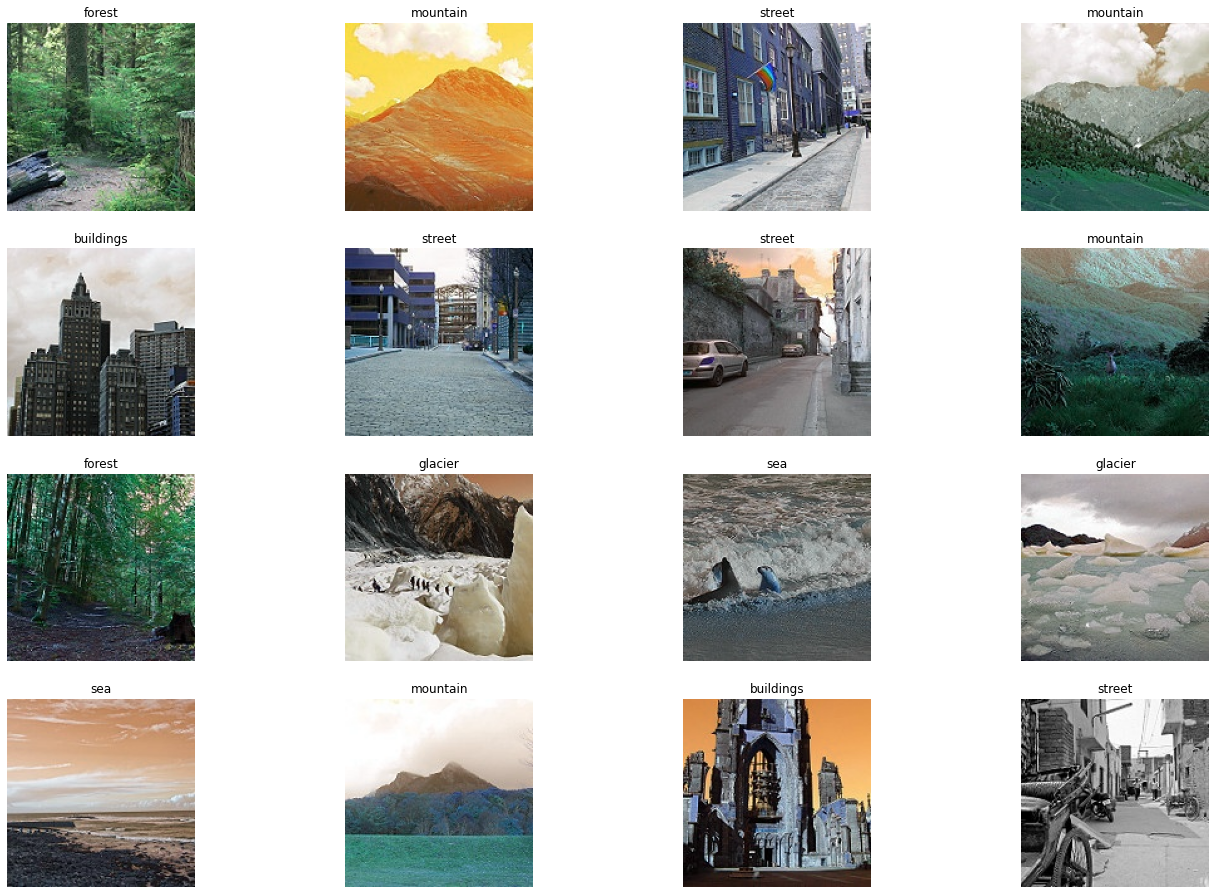

In [ ]:
# Displaying 16 random images from training set
images_displaying(respective_training_images, respective_training_classes, 4, 4)

In [ ]:
respective_train_labels = encoding_label(respective_training_classes)
respective_train_labels = np.array(respective_train_labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
def cnn_model():
  cnn = Sequential()
  cnn.add(Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)))
  cnn.add(MaxPooling2D(pool_size = (2,2)))
  cnn.add(Conv2D(64, (3,3), activation = 'relu'))
  cnn.add(MaxPooling2D(pool_size = (2,2)))
  cnn.add(Conv2D(64, (3,3), activation = 'relu'))
  cnn.add(MaxPooling2D(pool_size = (2,2)))
  cnn.add(Flatten())
  cnn.add(Dense(32, activation = 'relu'))
  cnn.add(Dense(16, activation = 'relu'))
  cnn.add(Dense(6, activation = 'softmax'))
  return cnn
cnn = cnn_model()
cnn.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

modelhistory_m = N_fold_respective_cross_validator(10, respective_training_images, respective_train_labels, cnn)

Training:  1
Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


351/351 [==============================] - 423s 1s/step - loss: 1.5493 - accuracy: 0.5592 - val_loss: 7.9388 - val_accuracy: 0.0057
Epoch 2/2
351/351 [==============================] - 389s 1s/step - loss: 0.8551 - accuracy: 0.6628 - val_loss: 10.0901 - val_accuracy: 0.0146


Training:  2
Epoch 1/2
351/351 [==============================] - 380s 1s/step - loss: 0.7413 - accuracy: 0.7063 - val_loss: 12.7797 - val_accuracy: 0.0314
Epoch 2/2
351/351 [==============================] - 389s 1s/step - loss: 0.6383 - accuracy: 0.7584 - val_loss: 13.1315 - val_accuracy: 0.0702


Training:  3
Epoch 1/2
351/351 [==============================] - 384s 1s/step - loss: 0.5471 - accuracy: 0.7959 - val_loss: 19.8902 - val_accuracy: 0.1022
Epoch 2/2
351/351 [==============================] - 399s 1s/step - loss: 0.4562 - accuracy: 0.8382 - val_loss: 16.7381 - val_accuracy: 0.1340


Training:  4
Epoch 1/2
351/351 [==============================] - 398s 1s/step - loss: 0.4124 - accuracy: 0.8530 - val_lo

In [ ]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

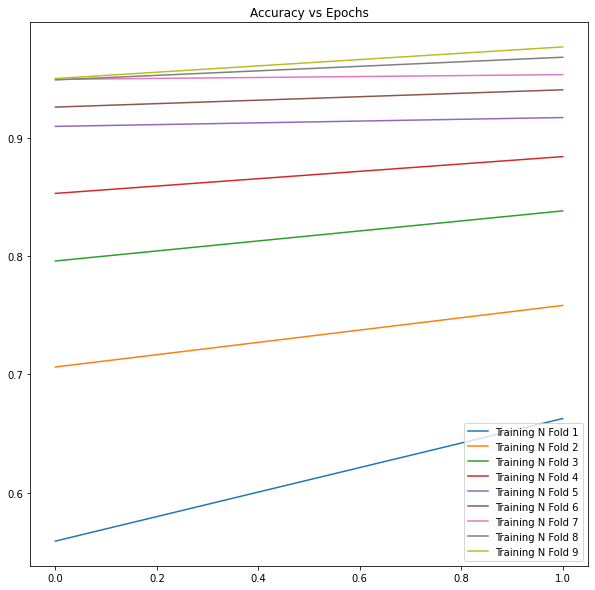

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Accuracy vs Epochs')

for i in range(0,9):
  plt.plot(modelhistory_m[i].history['accuracy'], label='Training N Fold '+str(i+1))

plt.legend() 
plt.show()

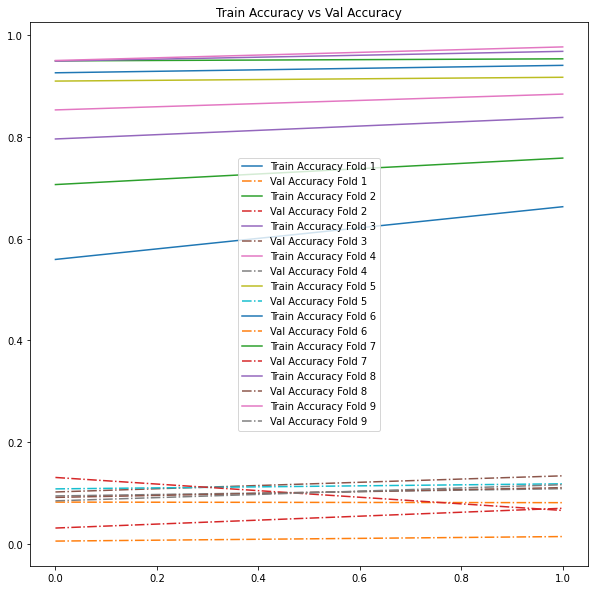

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Train Accuracy vs Val Accuracy')
for i in range(0,9):
  plt.plot(modelhistory_m[i].history['accuracy'], label='Train Accuracy Fold '+str(i+1))
  plt.plot(modelhistory_m[i].history['val_accuracy'], label='Val Accuracy Fold '+str(i+1), linestyle = "dashdot")
plt.legend()
plt.show()

In [ ]:
# Validation with test data
file_unzip('seg_test.zip')

In [ ]:
respective_test_images, respective_test_classes= images_reading('./seg_test', respective_image_directories)

In [ ]:
respective_test_images = np.array(respective_test_images)
respective_test_classes = np.array(respective_test_classes)

In [ ]:
print('Shape of Images:', respective_test_images.shape)
print('Shape of Classes:', respective_test_classes.shape)

Shape of Images: (3000, 150, 150, 3)
Shape of Classes: (3000,)


In [ ]:
respective_test_labels = encoding_label(respective_test_classes)
respective_test_labels = np.array(respective_test_labels)

In [ ]:
cnn.evaluate(respective_test_images, respective_test_labels)

94/94 [==============================] - 27s 286ms/step - loss: 10.0693 - accuracy: 0.6420


[10.069279670715332, 0.6420000195503235]

In [ ]:
# Building Confusion Matrix
predictions = cnn.predict(respective_test_images) 

In [ ]:
labels_predict = np.argmax(predictions, axis = 1)

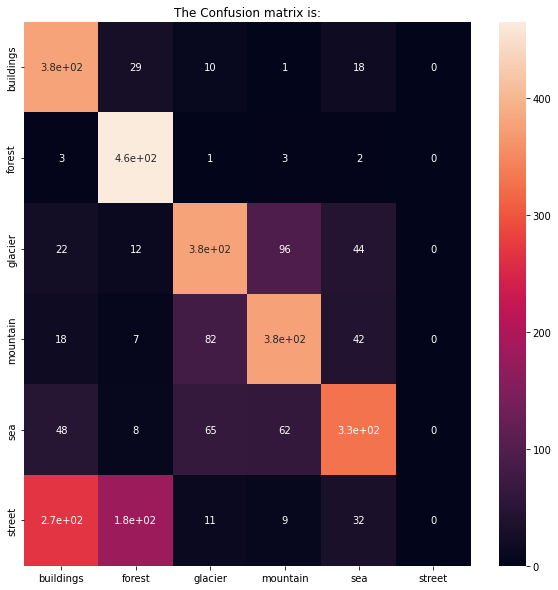

In [ ]:
Respective_Confusion_Matrix = confusion_matrix(respective_test_labels, labels_predict)
fig, ax = plt.subplots(figsize =(10,10))
ax = plt.axes()
sns.heatmap(Respective_Confusion_Matrix, annot=True, annot_kws={"size": 10}, xticklabels=respective_image_directories, yticklabels=respective_image_directories, ax = ax)
ax.set_title('The Confusion matrix is:')
plt.show()

In [ ]:
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, load_model, Model
import tensorflow as tf
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255.,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
d_input_shape = (150,150)
batch_size = 16
traingen = datagen.flow_from_directory('./seg_train',target_size = d_input_shape,class_mode='categorical',batch_size=batch_size,shuffle=False)

testgen = test_datagen.flow_from_directory('./seg_test',target_size = d_input_shape,class_mode='categorical',batch_size=batch_size,shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model = Sequential()
L2 = tf.keras.regularizers.l2(0.001)
input_shape = (150,150,3)


model = tf.keras.applications.VGG19(include_top=False, input_shape=input_shape)
for layer in model.layers:
    layer.trainable=False
flat = Flatten()(model.layers[-1].output)
hidden1 = Dense(128,activation='relu')(flat)
output = Dense(6,activation='softmax')(hidden1)

model = Model(inputs=model.inputs, outputs=output)

In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0  

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= optimizers.Adam(0.001), metrics=['accuracy'])

In [ ]:
metric = model.evaluate(testgen)
print(f'The Loss of evluation is: {metric[0]}')
print(f'The Accuracy of evluation is: {metric[1]:.2%}')

188/188 [==============================] - 749s 4s/step - loss: 1.8945 - accuracy: 0.2080
The Loss of evluation is: 1.8944510221481323
The Accuracy of evluation is: 20.80%
